# RFM Analysis

**Customer segmentation** is the practice of grouping customers based on common characteristics. These customer segments are beneficial in marketing campaigns, in identifying potentially profitable customers, and in developing customer loyalty. A company might segment customers according to a wide range of factors, including: demographics (age, gender, location etc), behaviour (previous orders, responses to messaging), psychographics (values, interests, lifestyles) etc.<br>

**RFM (Recency-Frequency-Monetary)** analysis is a simple technique for behaviour based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy. It is a handy method to find the best customers, understand their behavior and then run targeted marketing campaigns to increase sales, satisfaction and customer lifetime value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Dataset Overview

In [2]:
df = pd.read_excel('Data-Customer.xlsx')
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
158115,550275,22366,DOORMAT AIRMAIL,2,2011-04-15 12:35:00,7.95,13993.0,United Kingdom
423282,573137,82583,HOT BATHS METAL SIGN,1,2011-10-27 17:15:00,4.13,NaN,United Kingdom
186296,552857,22149,FELTCRAFT 6 FLOWER FRIENDS,1,2011-05-11 15:34:00,4.13,NaN,United Kingdom
396239,571061,21934,SKULL SHOULDER BAG,1,2011-10-13 14:33:00,3.29,NaN,United Kingdom
402120,571465,21088,SET/6 FRUIT SALAD PAPER CUPS,2,2011-10-17 14:29:00,0.19,14830.0,United Kingdom
154214,549874,84596L,BISCUITS SMALL BOWL LIGHT BLUE,16,2011-04-12 15:23:00,0.42,16919.0,United Kingdom
428697,573496,22499,WOODEN UNION JACK BUNTING,1,2011-10-31 11:59:00,5.95,17841.0,United Kingdom
5269,536856,22759,SET OF 3 NOTEBOOKS IN PARCEL,12,2010-12-03 10:26:00,1.65,13370.0,United Kingdom
65742,541696,47593B,SCOTTIE DOGS BABY BIB,2,2011-01-20 18:08:00,0.83,NaN,United Kingdom
385862,570218,22978,PANTRY ROLLING PIN,6,2011-10-09 12:20:00,3.75,16873.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Number of records in dataset is: 541,909**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Remove null value**

In [7]:
df['InvoiceNo'].str.contains('C').count()

8905

In [8]:
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

**Remove canceled orders**

In [74]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

**what products do you have? and what are the most ordered product?**

In [71]:
df.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

**How many countries do orders come from? And how many orders from each country?**

In [78]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
510691,579465,22114,HOT WATER BOTTLE TEA AND SYMPATHY,1,2011-11-29 14:53:00,4.25,15790,United Kingdom,4.25
205423,554809,23068,ALUMINIUM HEART,6,2011-05-26 13:13:00,2.49,16838,United Kingdom,14.94
171436,551417,48194,DOORMAT HEARTS,10,2011-04-28 13:41:00,6.75,15632,United Kingdom,67.50
213606,555547,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-06-05 13:13:00,1.65,12681,France,19.80
427596,573393,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,24,2011-10-30 15:08:00,0.29,14158,United Kingdom,6.96
297433,562944,22664,TOY TIDY DOLLY GIRL DESIGN,10,2011-08-11 09:34:00,2.10,13985,United Kingdom,21.00
421127,572921,22689,DOORMAT MERRY CHRISTMAS RED,1,2011-10-26 16:57:00,8.25,15993,United Kingdom,8.25
412402,572287,23048,SET OF 10 LANTERNS FAIRY LIGHT STAR,2,2011-10-23 12:26:00,4.15,15584,United Kingdom,8.30
80788,543096,21169,YOU'RE CONFUSING ME METAL SIGN,1,2011-02-03 11:39:00,1.69,14044,United Kingdom,1.69
187157,552951,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,2,2011-05-12 12:05:00,2.10,14988,United Kingdom,4.20


In [79]:
minus = df[df['Quantity'] < 0]['Quantity']
df.drop(minus.index, inplace=True)

In [80]:
df.groupby(['InvoiceNo']).agg({'TotalPrice':'sum'}).sort_values('TotalPrice', ascending = False).head(10)

,TotalPrice
InvoiceNo,
581483,168469.60
541431,77183.60
556444,38970.00
567423,31698.16
556917,22775.93
572209,22206.00
567381,22104.80
563614,21880.44
550461,21535.90


**Ranking of the 10 largest invoice by value**

In [15]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


**The most 5 ordered products**

In [16]:
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050


**The most 5 country that spend money**

# Customer Segmentation with RFM Scores


## Recency, Frequency, Monetary

RFM model combines three different customer attributes to rank customers:<br>

- **Recency (R):** Who have purchased recently? Number of days since last purchase
- **Frequency (F):** Who has purchased frequently? The total number of purchases
- **Monetary Value(M):** Who has high purchase amount? The total money customer spent


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
df.shape

(397924, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [20]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [21]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [22]:
import datetime as dt

today_date = dt.datetime(2011,12,9)
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [23]:
df.groupby('CustomerID').agg({'InvoiceDate':'max'}).head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [24]:
df["CustomerID"] = df["CustomerID"].astype(int)

In [25]:
(today_date - df.groupby('CustomerID').agg({'InvoiceDate':'max'})).head()

,InvoiceDate
CustomerID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [26]:
temp_df = (today_date - df.groupby('CustomerID').agg({'InvoiceDate':'max'}))

In [27]:
temp_df.rename(columns = {"InvoiceDate" : "Recency"}, inplace = True)

In [28]:
temp_df

,Recency
CustomerID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00
...,...
18280,276 days 14:08:00
18281,179 days 13:07:00
18282,6 days 12:17:00


In [29]:
recency_df = temp_df['Recency'].apply(lambda x : x.days)

In [30]:
recency_df.head()

CustomerID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

# Frequency

In [31]:
temp_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceNo' : 'count'})

In [32]:
temp_df.head(10)

InvoiceNo
CustomerID InvoiceNo           
12346      541431             1
12347      537626            31
           542237            29
           549222            24
           556201            18
           562032            22
           573511            47
           581180            11
12348      539318            17
           541998             6

In [33]:
temp_df.groupby('CustomerID').agg({'InvoiceNo' : 'count'}).head(10)

,InvoiceNo
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1


In [34]:
freq_df = temp_df.groupby('CustomerID').agg({'InvoiceNo':'sum'})
freq_df.rename(columns={'InvoiceNo' : 'Frequency'}, inplace=True)
freq_df

,Frequency
CustomerID,
12346,1
12347,182
12348,31
12349,73
12350,17
...,...
18280,10
18281,7
18282,12


# Monetary

In [35]:
mone_df = df.groupby('CustomerID').agg({'TotalPrice':'sum'})
mone_df.head()

,TotalPrice
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [36]:
mone_df.rename(columns={'TotalPrice':'Monetary'}, inplace=True)

In [37]:
recency_df.shape, freq_df.shape, mone_df.shape

((4339,), (4339, 1), (4339, 1))

In [38]:
rfm = pd.concat([recency_df, freq_df, mone_df], axis=1)

In [39]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,324,1,77183.60
12347,1,182,4310.00
12348,74,31,1797.24
12349,17,73,1757.55
12350,309,17,334.40


In [40]:
rfm['RecencyScore'] = pd.qcut(rfm['Recency'],5, labels=[5,4,3,2,1])

In [41]:
rfm['FrequencyScore'] =  pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])

In [42]:
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [43]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,324,1,77183.60,1,1,5
12347,1,182,4310.00,5,5,5
12348,74,31,1797.24,2,3,4
12349,17,73,1757.55,4,4,4
12350,309,17,334.40,1,2,2


In [44]:
rfm.shape

(4339, 6)

In [45]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4339 non-null   int64   
 1   Frequency       4339 non-null   int64   
 2   Monetary        4339 non-null   float64 
 3   RecencyScore    4339 non-null   category
 4   FrequencyScore  4339 non-null   category
 5   MonetaryScore   4339 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.9 KB


In [46]:
rfm['RFM_SCORE'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [47]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346,324,1,77183.60,1,1,5,115
12347,1,182,4310.00,5,5,5,555
12348,74,31,1797.24,2,3,4,234
12349,17,73,1757.55,4,4,4,444
12350,309,17,334.40,1,2,2,122


In [48]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,91.041484,100.007757,-1.0,16.000,49.00,140.50,372.00
Frequency,4339.0,91.708689,228.792852,1.0,17.000,41.00,100.00,7847.00
Monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


# RFM Customer Segments


- **Champions** - bought recently, buy often and spend the most
- **Potential Loyalist** - recent customers, but spent a good amount and bought more than once
- **New Customers** - bought most recently, but not often
- **Promising** - recent shoppers, but haven’t spent much
- **Loyal Customers** - spend good money and often, responsive to promotions
- **Need Attention** - above average recency, frequency and monetary values; may not have bought very recently though
- **About To Sleep** - below average recency, frequency and monetary values; will lose them if not reactivated
- **Can't Loose** - made biggest purchases, and often but haven’t returned for a long time
- **At Risk** - spent big money and purchased often but long time ago; need to bring them back
- **Hibernating** - last purchase was long back, low spenders and low number of orders


In [49]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [50]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346,324,1,77183.60,1,1,5,115,Hibernating
12347,1,182,4310.00,5,5,5,555,Champions
12348,74,31,1797.24,2,3,4,234,At Risk
12349,17,73,1757.55,4,4,4,444,Loyal Customers
12350,309,17,334.40,1,2,2,122,Hibernating


In [66]:
sort = rfm[['Segment', 'Recency', 'Frequency', 'Monetary']].groupby('Segment').agg(['mean','count'])
sort

Recency         Frequency           Monetary      
                           mean count        mean count         mean count
Segment                                                                   
About to Sleep        51.325949   316   15.740506   316   449.344873   316
At Risk              165.096055   583   56.190395   583   985.514923   583
Can't Loose          142.226190    84  181.666667    84  2370.705012    84
Champions              4.411862   607  288.650741   607  6950.135074   607
Hibernating          208.466981  1060   13.385849  1060   536.726238  1060
Loyal Customers       32.224117   821  156.633374   821  2835.492862   821
Need Attention        50.733333   210   41.295238   210   845.590048   210
New Customers          5.309091    55    7.345455    55  3742.133091    55
Potential Loyalists   14.728916   498   34.337349   498   905.155424   498
Promising             21.161905   105    7.228571   105   437.718381   105

In [67]:
df_new = pd.DataFrame()
df_new['NewCustomerID'] = rfm[rfm['Segment'] == 'New Customers'].index

In [68]:
df_new.head()

,NewCustomerID
0,12367
1,12442
2,12558
3,12587
4,12660


In [69]:
df_new.to_csv(r'D:\Jupyter\Custome-Dataset\New-Customers.csv')

C:\Users\nawaf\AppData\Local\Temp\ipykernel_6960\798259632.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm[x])


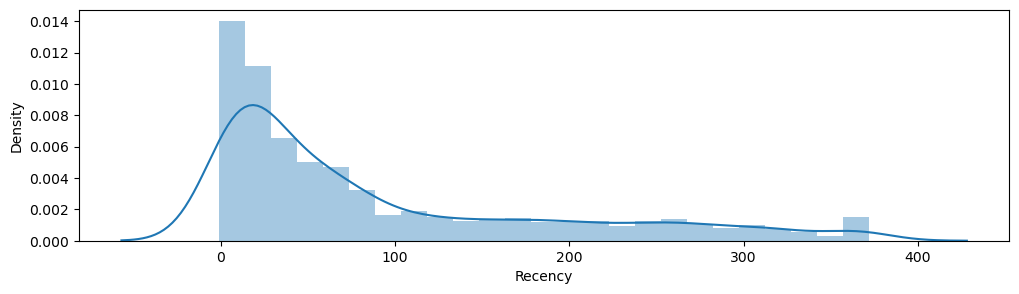

C:\Users\nawaf\AppData\Local\Temp\ipykernel_6960\798259632.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm[x])


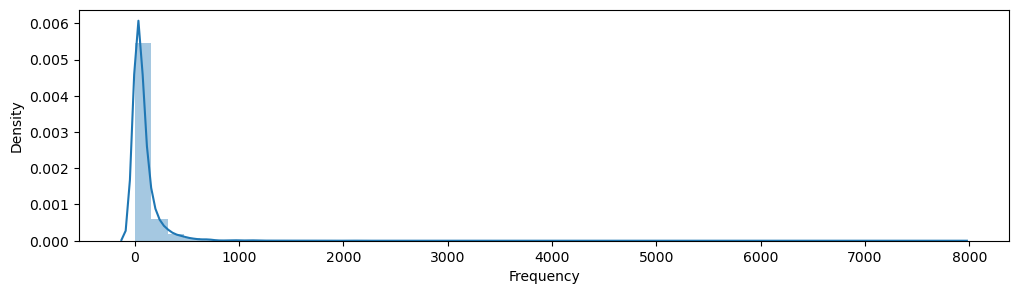

C:\Users\nawaf\AppData\Local\Temp\ipykernel_6960\798259632.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm[x])


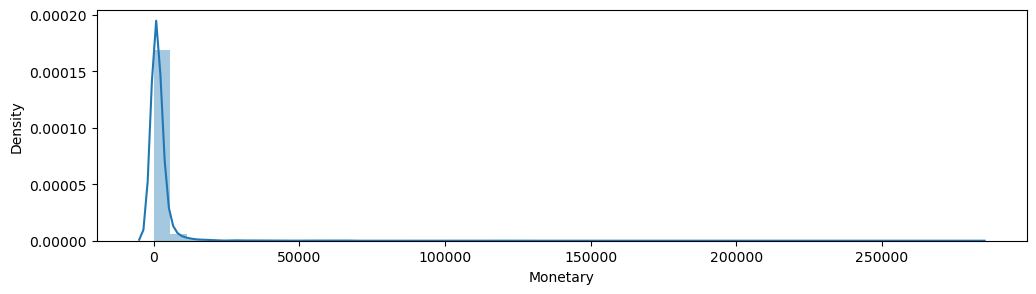

In [85]:
columns = ['Recency','Frequency','Monetary']
for x in columns :
    plt.subplots(figsize=(12,3))
    sb.distplot(rfm[x])

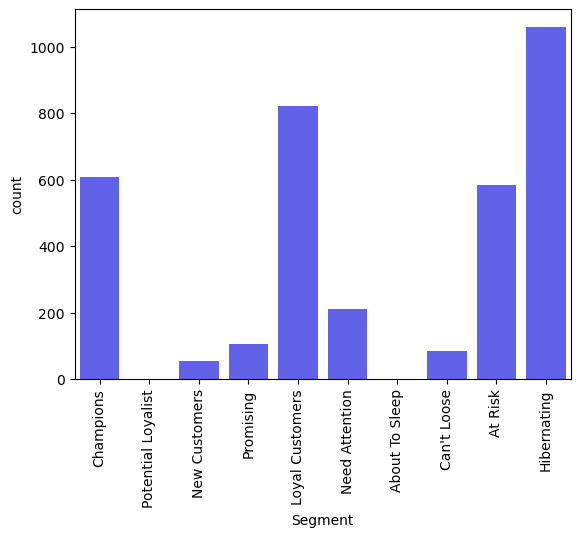

In [103]:
sb.countplot(data=rfm, x='Segment', color='blue', alpha=0.7, order=['Champions', 'Potential Loyalist', 'New Customers', 'Promising','Loyal Customers','Need Attention','About To Sleep','Can\'t Loose','At Risk','Hibernating']);
plt.xticks(rotation=90);